In [1]:
from gensim.models import Word2Vec
import gensim.downloader as api
import numpy as np
import pandas as pd
from scripts.embeddings.preprocessing import prepare_sentences, remove_duplicates
from umap import UMAP
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import umap.plot


c:\Users\Michi\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
recs = pd.read_excel("data/Recommendations_label.xlsx")
uniq = recs["Recommendation"].unique()
clean = prepare_sentences(uniq)
clean

['accept lower level service',
 'accept risk untested scenario change service level accordingly',
 'acknowledge mistake compensate',
 'acknowledge mistake compensate give insight use improvement',
 'actively communicate status expected resolution time available',
 'align required available crisis comms channel heat moment',
 'apply change management roadmap cm process program management',
 'ask smart phone vendor different retry scheme',
 'assign train deputy',
 'attach value improvement process',
 'be front runner well',
 'be part research report',
 'block number range release stepwise',
 'bronze v gold quality service level',
 'build crisis organisation',
 'business continuity plan',
 'buy tool',
 'central contact list',
 'chase resource write execute ivr recording',
 'check service connectivity case signalling storm give action perspective',
 'clear guideline crisis communication',
 'complete performance test new equipment gamma',
 'configure monitoring recognize untested scenario',

In [3]:
model = SentenceTransformer('sentence-t5-xl')
embeddings = model.encode(clean)

In [4]:
umap_model = UMAP().fit(embeddings)
standard_embedding = umap_model.transform(embeddings)

In [31]:
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=uniq.astype(int), s=0.1, cmap='Spectral')
plt.show()

ValueError: invalid literal for int() with base 10: 'Accept a lower level of service'

In [5]:
labels = pd.read_excel("data/Recommendations_label.xlsx")["Label"]

<AxesSubplot:>

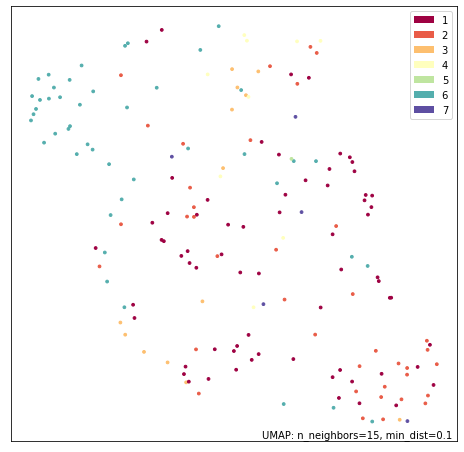

In [6]:
umap.plot.points(umap_model,labels=labels)